#### RFM Analysis

- Here the dataset contains a customer transaction data.
- We use columns transaction_id, transaction_date, and list_price to calculate frequency, recency, and monetary value. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name="Transactions")

In [4]:
df.shape

(20000, 26)

In [7]:
# We use only the named columns
df = df.iloc[:,0:13]

In [8]:
df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,17135,49,17,2017-12-30,0.0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1997-10-04
1,9158,88,86,2017-12-30,1.0,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,1993-07-15
2,12453,12,151,2017-12-30,0.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,2010-11-05
3,15270,3,195,2017-12-30,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2012-09-15
4,16759,27,256,2017-12-30,0.0,Approved,Trek Bicycles,Standard,low,medium,1057.51,154.40,2010-06-07


In [9]:
df1 = df[df.order_status == 'Approved']
# For Analysis We take only those data where the order is approved

In [10]:
df1.shape

(19821, 13)

#### Grouping by customer id
- The count of transaction_id gives the no. of times the customer made a purchase: frequency
- The latest transaction date gives info on recency. 
- The sum of list_price gives the money spent by the customer: monetary value.

In [12]:
df2 = df1.groupby('customer_id').agg({'transaction_id':'count','transaction_date':'max','list_price':'sum'})

In [13]:
# renaming columns
df2.rename(columns={'transaction_id':'transactions_count','transaction_date':'last_transaction_date'},
           inplace=True)

In [14]:
# renaming columns
df2.rename(columns={'list_price':'Total_Amount'},inplace=True)

In [17]:
# Data for RFM Analysis , df2 is the table to get the RFM values
df2.head().sort_values(by='Total_Amount', ascending=False)


,transactions_count,last_transaction_date,Total_Amount
customer_id,,,
3,8,2017-09-19,9888.23
1,11,2017-12-23,9084.45
5,6,2017-12-14,5903.20
2,3,2017-08-24,4149.07
4,2,2017-06-18,1047.72


#### RFM Using Excel Method
- Used Datedif function to calculate the no of days since last order, used 2018-01-01 as the reference point
- Used PERCENTRANK.EXC to find the percentile value for each record of R, F & M.

In [43]:
df2.shape

(3493, 4)

In [39]:
# exporting to excel for RFM Analysis
df2.to_excel('RFM_data.xlsx')  


In [26]:
RFM_d = pd.read_excel("RFM_data.xlsx",sheet_name="Customer_Segments")

In [44]:
RFM_d.head()

,customer_id,R,F,M
0,1,9,9,8
1,2,1,0,2
2,3,1,7,8
3,4,0,0,0
4,5,7,4,4


In [45]:
RFM_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  3493 non-null   int64
 1   R            3493 non-null   int64
 2   F            3493 non-null   int64
 3   M            3493 non-null   int64
dtypes: int64(4)
memory usage: 109.3 KB


In [30]:
#  We check the distribution of recency, frequency , and monetary scores.

In [29]:
import seaborn as sns

C:\Users\ARAMMOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R', ylabel='Density'>

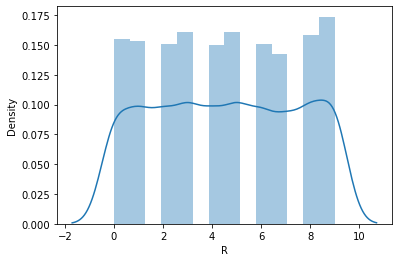

In [31]:
sns.distplot(RFM_d.R)

C:\Users\ARAMMOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F', ylabel='Density'>

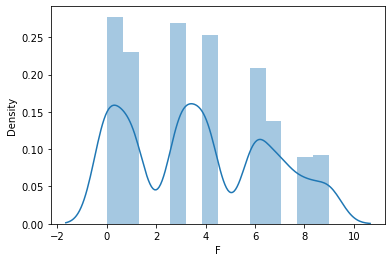

In [32]:
sns.distplot(RFM_d.F)

C:\Users\ARAMMOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='M', ylabel='Density'>

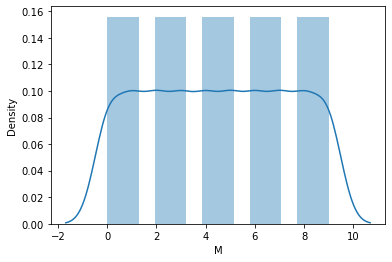

In [33]:
sns.distplot(RFM_d.M)

 #### Now we use K-Means Clustering Algorithm to segment the customers based on RFM Score

In [8]:
from sklearn.cluster import KMeans

In [9]:
import matplotlib.pyplot as plt

In [10]:
RFM_d.iloc[:,1:]

,R,F,M
0,9,9,8
1,1,0,2
2,1,7,8
3,0,0,0
4,7,4,4
...,...,...,...
3488,4,0,1
3489,1,4,3
3490,4,6,7
3491,0,4,3


In [11]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(RFM_d.iloc[:,1:])
    wcss.append(km.inertia_)

In [12]:
wcss

[86141.56999713753,
 44623.766649580066,
 31496.305627041573,
 23335.53347429628,
 19523.968439277654,
 16133.23423554591,
 14618.144707035643,
 13370.913060982837,
 12332.286669127738,
 11482.72887655799]

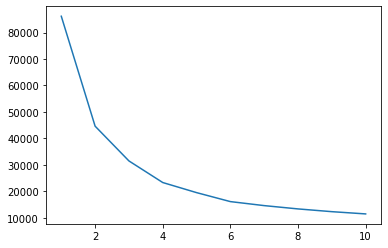

In [13]:
# next we plot the elbow chart, with wcss in y axis, 
# and the no. of clusters (range value in previous) on x-axis

plt.plot(range(1,11),wcss)

##### From the elbow chart, we decide to have 5 clusters/Sements of customer_id

In [20]:
kmeans=KMeans(n_clusters=5)
kmeans.fit_predict(RFM_d.iloc[:,1:])
RFM_d["Clusters"]=(kmeans.labels_+1)


In [29]:
# You should use fit_predict both while making the elbow chart and while segmentation.

In [21]:
RFM_d.head().sort_values(by='Clusters',ascending=False)

,customer_id,R,F,M,Clusters
0,1,9,9,8,5
4,5,7,4,4,4
2,3,1,7,8,2
1,2,1,0,2,1
3,4,0,0,0,1


In [22]:
RFM_d.Clusters.value_counts()

4    792
1    767
5    717
3    672
2    545
Name: Clusters, dtype: int64

In [28]:
RFM_d[RFM_d.Clusters == 5]

,customer_id,R,F,M,Clusters
0,1,9,9,8,5
7,8,7,9,9,5
12,13,6,6,7,5
22,23,8,6,7,5
23,24,7,7,7,5
...,...,...,...,...,...
3459,3468,9,6,6,5
3461,3470,9,7,9,5
3463,3472,9,4,6,5
3473,3482,6,7,9,5


In [31]:
# export the customer segment xlsx
RFM_d.to_excel('RFM_Clusters.xlsx')

In [48]:
# interpreting the results

In [49]:
RFM_d.groupby('Clusters')["R","F","M"].mean()

<ipython-input-49-c05c94f41c03>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  RFM_d.groupby('Clusters')["R","F","M"].mean()


,R,F,M
Clusters,,,
1,1.637549,0.512386,1.176010
2,3.416514,6.829358,7.574312
3,2.400298,3.540179,4.693452
4,7.189394,2.108586,2.782828
5,7.608089,6.772664,7.435146


- The above results indicate that the customers in Cluster 5 are high value customers.
- They score high in all the three factors.
- The customers in cluster 2 need to be targeted with reactivation campaigns as their recency is low but the number of orders and amount spent is high.
- The customers in cluster 4 seem relatively new customers and need more incentives and product-based offers so that they buy more.